In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt

# Mapa de CABA: elecciones 2019
### Resultado de votación para Presidente y Vicepresidente de la Republica: CONSENSO FEDERAL

In [11]:
# Cargo el shapefile y la tabla de comunas de consenso federal para usar la columna de votos
shapefile_path_elecciones = ".././dataset/elecciones_2019/CABA.shp"
comuna_consenso_path      = "../TP2/tablas/comuna_consenso.csv"
comuna_consenso           = pd.read_csv(comuna_consenso_path)
CABA_elecciones           = gp.read_file(shapefile_path_elecciones)

#### Dataset de comunas, en orden descendente segun resultados de Consenso Federal

In [16]:
comuna_consenso

,NOMBRE_AGRUPACION,NOMBRE_REGION,VOTOS_AGRUPACION
0,CONSENSO FEDERAL,COMUNA 12,76341
1,CONSENSO FEDERAL,COMUNA 11,73767
2,CONSENSO FEDERAL,COMUNA 10,65931
3,CONSENSO FEDERAL,COMUNA 7,65686
4,CONSENSO FEDERAL,COMUNA 13,65254
5,CONSENSO FEDERAL,COMUNA 9,63038
6,CONSENSO FEDERAL,COMUNA 6,61431
7,CONSENSO FEDERAL,COMUNA 15,58865
8,CONSENSO FEDERAL,COMUNA 5,57158
9,CONSENSO FEDERAL,COMUNA 4,56086


#### Dataset de CABA

In [14]:
CABA_elecciones.head()

,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,0045,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,0037,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0018,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,0141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."


#### Agrupacion por comunas

In [4]:
# Agrupo los poligonos por cabecera mediante DISSOLVE. Para eso uso un subset del total
# Fuente: https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html
df = CABA_elecciones[['cabecera', 'geometry']]
df_merged = df.dissolve(by='cabecera')
df_merged.reset_index(inplace=True)
df_merged


,cabecera,geometry
0,Comuna 1,MULTIPOLYGON Z (((-6498601.107 -4089246.061 0....
1,Comuna 10,"POLYGON Z ((-6509104.546 -4090034.315 0.000, -..."
2,Comuna 11,"POLYGON Z ((-6510892.226 -4088105.866 0.000, -..."
3,Comuna 12,"POLYGON Z ((-6513813.695 -4082925.766 0.000, -..."
4,Comuna 13,"POLYGON Z ((-6505718.319 -4082264.528 0.000, -..."
5,Comuna 14,"POLYGON Z ((-6503167.544 -4085094.415 0.000, -..."
6,Comuna 15,"POLYGON Z ((-6506096.916 -4086362.068 0.000, -..."
7,Comuna 2,"POLYGON Z ((-6502206.189 -4085134.666 0.000, -..."
8,Comuna 3,"POLYGON Z ((-6502377.287 -4089323.901 0.000, -..."
9,Comuna 4,"POLYGON Z ((-6503382.391 -4093538.433 0.000, -..."


#### Columna de votos

In [5]:
# Ahora sumo la columna de votos por comuna a traves de un join
# Para eso tengo que unificar los formatos de las columnas con info de las comunas
# Renombro nombre de columna
df_merged.rename(columns = {'cabecera':'NOMBRE_REGION'}, inplace = True)
# Paso a mayusculas
df_merged['NOMBRE_REGION'] = df_merged['NOMBRE_REGION'].str.upper()
# Merge
df_merged  = pd.merge(comuna_consenso[["NOMBRE_REGION", "VOTOS_AGRUPACION"]], df_merged, on='NOMBRE_REGION', how='left')
df_merged = gp.GeoDataFrame(df_merged)
df_merged

,NOMBRE_REGION,VOTOS_AGRUPACION,geometry
0,COMUNA 12,76341,"POLYGON Z ((-6513813.695 -4082925.766 0.000, -..."
1,COMUNA 11,73767,"POLYGON Z ((-6510892.226 -4088105.866 0.000, -..."
2,COMUNA 10,65931,"POLYGON Z ((-6509104.546 -4090034.315 0.000, -..."
3,COMUNA 7,65686,"POLYGON Z ((-6503900.249 -4089748.797 0.000, -..."
4,COMUNA 13,65254,"POLYGON Z ((-6505718.319 -4082264.528 0.000, -..."
5,COMUNA 9,63038,"POLYGON Z ((-6511318.023 -4094336.019 0.000, -..."
6,COMUNA 6,61431,"POLYGON Z ((-6507063.392 -4088859.429 0.000, -..."
7,COMUNA 15,58865,"POLYGON Z ((-6506096.916 -4086362.068 0.000, -..."
8,COMUNA 5,57158,"POLYGON Z ((-6502270.198 -4090035.661 0.000, -..."
9,COMUNA 4,56086,"POLYGON Z ((-6503382.391 -4093538.433 0.000, -..."


### Mapa de Comunas

<ipython-input-6-9a2f5037e306>:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['NOMBRE_REGION'], xy=row['coords'],horizontalalignment='center', fontsize=6)


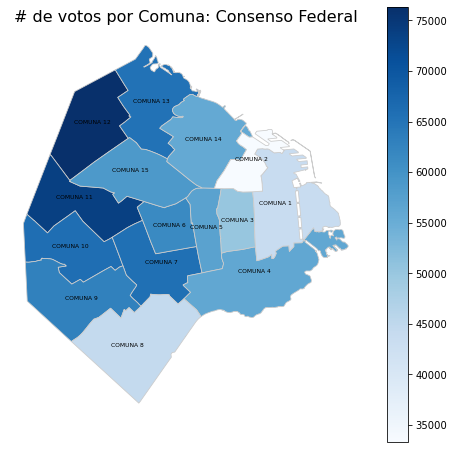

In [6]:
# MAPA DE CABECERAS
# Sigo tutorial para armar un mapa de color segun cantidad de votos en CABA
# Fuente: https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630
# Paletas de colores: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# variable a visualizar
variable = 'VOTOS_AGRUPACION'
# rangos max y min. Tomo los valores minimo y maximo de la columna de votos
vmin, vmax = df_merged.VOTOS_AGRUPACION.min(), df_merged.VOTOS_AGRUPACION.max()
# Armo el grafico
fig, ax = plt.subplots(1, figsize=(8, 8))
# Saco los ejes
plt.axis('off')
# Agrego titulo
ax.set_title('# de votos por Comuna: Consenso Federal', fontdict={'fontsize': '16', 'fontweight' : '3'})
# Agrego leyenda de barra
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
# Agrego barra de colores
fig.colorbar(sm)
# Armo mapa
df_merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
# Agrego nombres de comunas como labels
df_merged['coords'] = df_merged['geometry'].apply(lambda x: x.representative_point().coords[:])
df_merged['coords'] = [coords[0] for coords in df_merged['coords']]
for idx, row in df_merged.iterrows():
    plt.annotate(s=row['NOMBRE_REGION'], xy=row['coords'],horizontalalignment='center', fontsize=6)

plt.show()

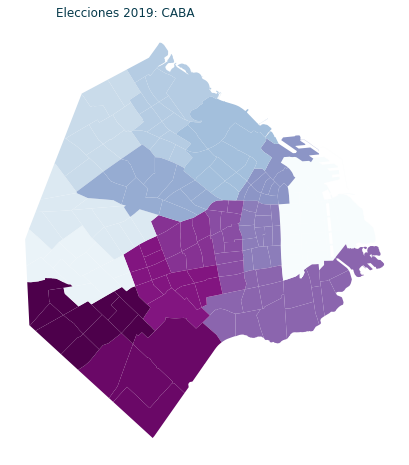

In [7]:
# MAPA DE DISTRITOS
CABA_elecciones.plot(column = 'departamen', cmap = 'BuPu', figsize = (8,8))
#Removing the x-axis and y-axis
plt.axis('off')
plt.title("Elecciones 2019: CABA", x = 0.3, color = '#073B4C')
plt.show()

# Censo 2010: radio censales

#### Mapa de CABA, presente en la carpeta de radio censales del censo 2010

In [8]:
shapefile_path_censo = ".././dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp"
CABA_censo = gp.read_file(shapefile_path_censo)
CABA_censo.columns

Index(['AREA', 'PERIMETER', 'PAIS0210_', 'PAIS0210_I', 'PROV', 'DEPTO', 'FRAC',
       'RADIO', 'TIPO', 'LINK', 'VARONES', 'MUJERES', 'TOT_POB', 'HOGARES',
       'VIV_PART', 'VIV_PART_H', 'geometry'],
      dtype='object')

In [9]:
CABA_censo.head(3)

,AREA,PERIMETER,PAIS0210_,PAIS0210_I,PROV,DEPTO,FRAC,RADIO,TIPO,LINK,VARONES,MUJERES,TOT_POB,HOGARES,VIV_PART,VIV_PART_H,geometry
0,1760908.0,7579.745,2,1,02,013,03,02,U,020130302,312.0,342.0,654.0,270.0,377.0,265.0,"POLYGON ((4192267.085 6152975.831, 4192240.425..."
1,2240206.0,14184.670,3,2,02,013,11,01,U,020131101,296.0,272.0,568.0,172.0,217.0,170.0,"POLYGON ((4193005.531 6152773.045, 4193022.852..."
2,28001.0,720.460,4,3,02,013,01,04,U,020130104,379.0,384.0,763.0,367.0,524.0,355.0,"POLYGON ((4192119.600 6153045.088, 4192222.042..."


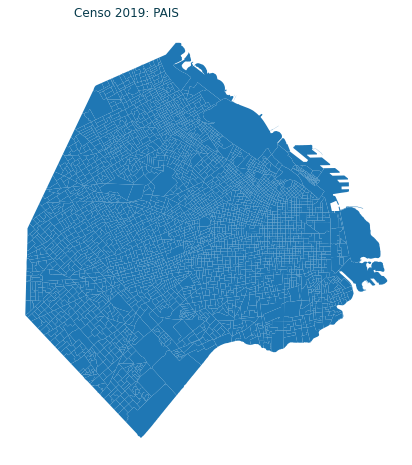

In [10]:
# Visualizing the map
CABA_censo.plot(figsize = (8,8))
#Removing the x-axis and y-axis
plt.axis('off')
plt.title("Censo 2019: PAIS", x = 0.3, color = '#073B4C')
plt.show()